# BBC Classification Pipeline
## Setup

In [1]:
# Import magic from ex4ml
from ex4ml.datasets.nlp.bbc import load_bbc
from ex4ml.ml import ml
from ex4ml import viz

# Import models from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Import language processing from spaCy
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Loading Data
---
Here, we load in the spaCy (python library for Natural Language Processing) English model so we can vectorize texts. 

In [2]:
# 'en' - English model
nlp = spacy.load("en")

Here, we load the BBC news article dataset into an ex4ml DataObject. Then we use spaCy to turn each article into a single vector (using GloVe embeddings) and store the vector as a view per data item.

In [3]:
# Load dataset from ex4ml
bbc_data = load_bbc()

Data already exists. Will not re-download. If you would like to download it anyway, please set force_download to True.


In [4]:
# Assign GloVe view to every data item in data set
bbc_data.views = [{"GloVe": nlp(str(w)).vector} for w in bbc_data]

## Visualizing Data
---
Here, we visualize two principle components of the data using PCA in a scatter plot with colors representing the different classes in the data.

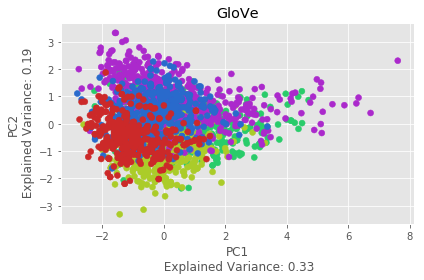

In [5]:
# Plot PCA
viz.plot_scatter(bbc_data, "GloVe", "topic")

## Model Selection
---
We create our models and parameter ranges to feed into ex4ml.

In [6]:
# Create classification models from sklearn
knn_classifier = KNeighborsClassifier()
logistic_classifier = LogisticRegression()

# Create possible parameter values
knn_param_grid = {'n_neighbors': [5, 10, 15, 20]}
logistic_param_grid = {'penalty': ["l2", "l1"], 'C': [0.25, 0.5, 0.75, 1.0]}

# Create estimator dictionary for ex4ml
knn_estimator = {'name': "kNN", "estimator": knn_classifier, 'parameters': knn_param_grid}
logistic_estimator = {'name': "LR", "estimator": logistic_classifier, 'parameters': logistic_param_grid}

## Experimentation
---
Here, we perform cross validation grid search with our parameters on our selected models, selected view, and selected target retrieving the best results in a nicely formatted $\LaTeX$ table.

In [7]:
# Perform experiment
latex_results, results = ml.run_sl(bbc_train, bbc_test,
                    [knn_estimator, logistic_estimator],
                    scoring="accuracy", view="GloVe", target="topic")

## Results

In [8]:
print(latex_results)

\begin{tabular}{lrr}
\toprule
Estimator &     Score &   Std Dev \\
\midrule
      kNN &  0.706517 &  0.014538 \\
       LR &  0.858876 &  0.011885 \\
\bottomrule
\end{tabular}



In [9]:
results[["Estimator", "Score", "Std Dev"]]

,Estimator,Score,Std Dev
0,kNN,0.706517,0.014538
1,LR,0.858876,0.011885
